In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

Some materials related to lecture 1 of System Biology Course by Uri Alon

Link: [Systems biology course 2018 Uri Alon - Lecture 1](https://www.youtube.com/watch?v=N6VZeWuME_A)

## Cells and proteins

E. Coli
* has size of 1um
* fully workging organism
* made of 4500 different proteins
* contain $10^6$ copies of proteins
* changes protins compisition according to environment signals (temperature, pH, toxines etc)

Proteins:
* do things in cells 
* size of nanometers
* contains $10^4$ atoms
* are polymers of aminoacids
* can be active or inactive (transition is microseconds)
* are encoded in genes as DNA

Question: How E Coli knows how to change composition?

## Genes to proteins

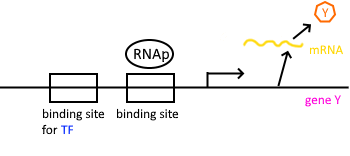

RNA polymerase can bind to region next to gene (*binding site*) and start copy gene information to mRNA (quickly made and destroyed, sth like scratch pad). Then mRNA is used to make protein.

So the protein making is two stage:
1. *transcription* - copy DNA to mRNA
1. *translation* - make protein from mRNA

Above pictures suggests that protin Y is made constantly

### How environment affects gene regulation

Cells represent the environment inside the cell by ~300 special proteins (transcription factors).
Environemt signals and internal things (is there a sugar? is my DNA damaged?) activates transcription factors (*TF*) which subsequently regulats genes.

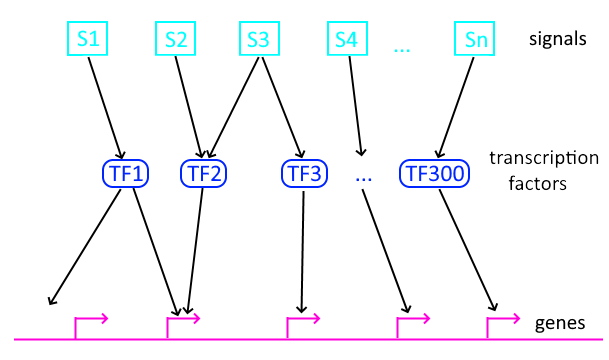

#### How signals affects transctiption factors?

TFs, being proteins, can be on or off. Extrnal signal binds to inactive TF and make more probable that TF will be activated.

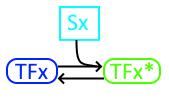

Activated TF binds to specific binding site in gene promotor and changes probability that RNA polymerase will make mRNA. 

TF can *increase* probability of polymerase binding therefore increasing gene production - it is colled **activator**.

TF can also interfere with polymerase and *decrease* gene production - it is called **repressor**.

Whole process looks like:
1. Signal *S* is recived
1. *S* binds to transcription factor and changes its conformation - TF becomes activated
1. Activated TF (TF*) diffuses into cell
1. TF* finds and binds to promotor
1. (TF is activator) RNA polymerase has more chance to start protein production
1. (TF is repressor) RNA polymerase has lower chance to start protein production

Notation:
* Sx - signal for transcription factor X
* X - transcription factor
* Y - gene regulated by TF X
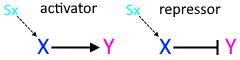

### Timescales

* Signal-TF interaction - microseconds
* TF diffusion and binding - seconds
* transcription and translation - minutes
* time to accumulate and reach functional level of protein - hours

This allows to assume that slow reactions are constant and quick reactions and instantaneous.

## Gene Regulation Network (GRN)

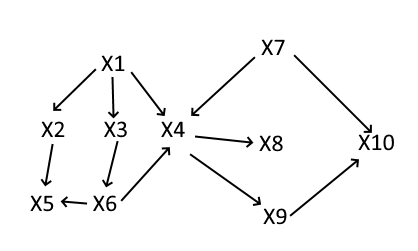

Graph with all regulation interactions. For E. Coli it has 4.5k nodes/genes and 10k edges/interactions.

**System biology** - to understand this network.

TF are the only nodes with outgoing edges (1 to 1000).

Each gene has 0 to 6 incoming edges.

### Dynamics

Rate of Y production given a concentration of X* (active form of TF) can be modelled by hill function:

$Y(X^*)=\frac{\beta (X^*)^n}{K^n+(X^*)^n}$

where:
* K - equilibrium constant of binding reaction; concentration of X* for which 50% binds
* $\beta$ - maximum Y concentration
* n - how steep the curve, typically 1 to 4

In [2]:
def rate_of_change(beta=1, k=1, n=2, activator=True):
    plt.figure()
    x = np.linspace(0, 4*k, num=1000)
    
    if activator:
        y = (beta*x**n) / (k**n + x**n)
    else:
        y = (beta*k**n) / (k**n + x**n)
    
    plt.plot([0, k], [beta/2, beta/2], 'k--')
    plt.plot([k, k], [0, beta/2], 'k--')
    
    plt.xlabel('$X^*$')
    plt.ylabel('Rate of Y production')
    plt.plot(x, y)
#     plt.show()

In [3]:
interact(rate_of_change, beta=(1, 5), k=(1, 4), n=(1, 10), activator=[('activator', True), ('repressor', False)]);

interactive(children=(IntSlider(value=1, description='beta', max=5, min=1), IntSlider(value=1, description='k'…

If we want to simplify it, it can be modelled as step function - $\beta$ if $X^*$ > K, otherwise 0.

### GRN with dynamics

Each edge/arrow in GRN has its own parameters.
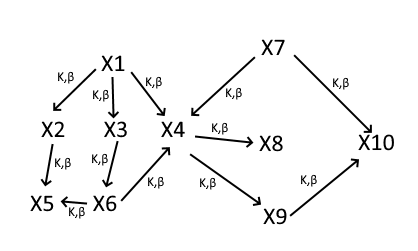

#### Two TFs regulating gene

We need 2D input functions. A lot of times it is product of two 1D input functions described above. It can model AND gates (both TFs are needed) or as OR gates (one TF is enough)

Biologist know how GRN looks like, but logic how multiple inputs are integrated is still unknown.

## Equation for dynamics of single arrow X -> Y

Use simplified model where production is $\beta$ (protein per unit time) if there is much input signal or 0.

If we have a lot of input signal, protein is made with $\beta$ rate. But if this is all the case, protein Y will be made constantly without a limit. So there is also proces of removing Y with rate of $\alpha$.

$\alpha = \alpha_{deg} + \alpha_{dil}$

Where:
* $\alpha_{deg}$ is active degradation (protein is cut into aminoacids)
* $\alpha_{dil}$ is cell growth - if there is the same amount of protein, but cell volume is dobuled, protein concentration is halved

$\frac{dY}{dt} = \beta -\alpha Y$

### Steady state

In steady state $\frac{dY}{dt}=0$

$0 = \beta -\alpha Y_{st}$

Level of Y is hence $Y_{st} = \frac{\beta}{\alpha}$

If there is more production, $Y_{st}$ is bigger. If then is more removal $Y_{st}$ is lower.

### Response time

#### $\beta$ drops to 0

How long does it take to reach steady state (functional concentration of Y)?

1. Start at $Y_{st}$ and suddenly $\beta \rightarrow 0$
1. $\frac{dY}{dt} = -\alpha Y$
1. Solution is $Y = Y_{st} e^{-\alpha t}$

Time to reach half steady state

$Y(T_{1/2}) = \frac{1}{2}Y_{st} = \frac{1}{2} Y_{st} e^{-\alpha T_{1/2}}$

$\frac{1}{2} = e^{-\alpha T_{1/2}}$

$-ln(2) = -\alpha T_{1/2}$

$T_{1/2} = \frac{ln(2)}{\alpha} $

It depends only on removal rate!

In [4]:
def plot_beta_drop(beta=1, alpha=2):
    Yst = beta/alpha
    plt.figure()
    halflife = 1/alpha * np.log(2)
    t = np.linspace(0, 3, num=1000)
    
    y = Yst * np.exp(-alpha*t)
    
    
    plt.plot([0, halflife], [Yst/2, Yst/2], 'k--')
    plt.plot([halflife, halflife], [0, Yst/2], 'k--')
    
    plt.xlabel('t')
    plt.ylabel('Y concentration')
    plt.plot(t, y)
    plt.annotate(f'$T_{{1/2}}={halflife:.3f}$', (halflife, Yst/2), xytext=(30, 15), size=13, textcoords='offset points', arrowprops=dict(arrowstyle="->"))

In [5]:
interact(plot_beta_drop,  beta=(1, 10), alpha=(1,10))

interactive(children=(IntSlider(value=1, description='beta', max=10, min=1), IntSlider(value=2, description='a…

<function __main__.plot_beta_drop(beta=1, alpha=2)>

#### $\beta$ goes to \$\beta$

How long does it take to reach steady state (functional concentration of Y)?

1. Start at 0 and suddenly $\beta \rightarrow \beta$
1. $\frac{dY}{dt} = \beta -\alpha Y$
1. Solution is $Y = Y_{st}\left(1-e^{-\alpha t}\right)$

Time to reach half steady state

$Y(T_{1/2}) = \frac{1}{2}Y_{st} = \frac{1}{2}Y_{st}\left(1-e^{-\alpha T_{1/2}}\right)$

$\frac{1}{2} = 1-e^{-\alpha t}$

$\frac{1}{2} = e^{-\alpha t}$

$-ln(2) = -\alpha T_{1/2}$

$T_{1/2} = \frac{ln(2)}{\alpha} $

The same result as before!

In [6]:
def plot_beta_up(beta=1, alpha=2):
    Yst = beta/alpha
    plt.figure()
    halflife = 1/alpha * np.log(2)
    t = np.linspace(0, 3, num=1000)
    
    y = Yst * (1-np.exp(-alpha*t))
    
    
    plt.plot([0, halflife], [Yst/2, Yst/2], 'k--')
    plt.plot([halflife, halflife], [0, Yst/2], 'k--')
    
    plt.xlabel('t')
    plt.ylabel('Y concentration')
    plt.plot(t, y)
    plt.annotate(f'$T_{{1/2}}={halflife:.3f}$', (halflife, Yst/2), xytext=(30, -15), size=13, textcoords='offset points', arrowprops=dict(arrowstyle="->"))

In [7]:
interact(plot_beta_up,  beta=(1, 10), alpha=(1,10))

interactive(children=(IntSlider(value=1, description='beta', max=10, min=1), IntSlider(value=2, description='a…

<function __main__.plot_beta_up(beta=1, alpha=2)>

#### $T_{1/2}$ in cells

To achieve quick response times for proteins, we need small $T_{1/2}$. But because $T_{1/2}$ is inversely dependent on $\alpha$, the latter should be very big.
This means that proteins are unstable and are constantly made and destroyed.

Making/removing proteins consumes energy and in E.Coli and humans most proteins are stable - has $\alpha_{deg}=0$

Another component of $\alpha$ is $\alpha_{dil}$. It has small value $\frac{ln(2)}{cell\,generation}$.

It means that if E.Coli needs a protein for sugar consumption and starts making protein, it children would have half steady state! This is weirdly too slow and Nature has another ways to overcome this problem.